# Assignment 3

Due Date:  11:59pm on Friday, November 13th (for now)

There are some subtle issues to worry about in each of these questions, and thus I
will be discussing each problem in class on Monday, November 9th.

## Question 1 - Fourier Analysis

Consider the following triangular pulse signal:

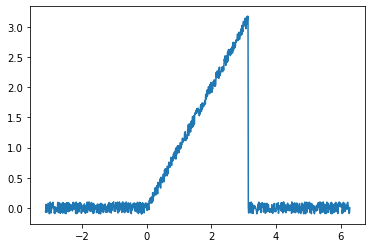

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random

fx = []

N_samples = 1000
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
        fx.append(y[i])
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
        fx.append(y[i])
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
        fx.append(y[i])
    
plt.plot(t,y)

(a) Using the jupyter notebooks called graph_fourier_basic.ipynb and graph_fourier_guitar.ipynb to help you, calcuate the Fourier transform of this signal.

You should create plots of both the real and imaginary Fourier components as a function
of frequency, a plot of the Fourier power spectrum as a function of frequency, and also
a plot of the time spectrum using the Fourier components as compared to the original time spectrum.

(b) Discuss the resulting Fourier spectrum. Which Fourier components do you expect to be small (or zero), based on the theory?  What is the Nyquist frequency, and how many terms in the Fourier series is necessary to give a good approximation to the original signal?

Nyquist Frequency = 53.0516
Max terms =  666
Data: n = 1.0000, a_n = -0.3137, bn = 0.4965
Data: n = 2.0000, a_n = -0.0020, bn = -0.2503
Data: n = 3.0000, a_n = -0.0336, bn = 0.1650
Data: n = 4.0000, a_n = -0.0045, bn = -0.1263
Data: n = 5.0000, a_n = -0.0132, bn = 0.1010
Data: n = 6.0000, a_n = -0.0010, bn = -0.0832
Data: n = 7.0000, a_n = -0.0024, bn = 0.0682
Data: n = 8.0000, a_n = -0.0034, bn = -0.0640
Data: n = 9.0000, a_n = 0.0003, bn = 0.0575
Data: n = 10.0000, a_n = -0.0036, bn = -0.0493


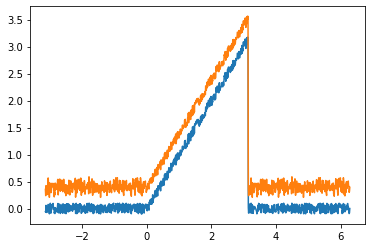

In [44]:
t = np.linspace(t_low,t_high,N_samples)
dt = (t_high-t_low)/N_samples

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0
print("Nyquist Frequency = %0.4f" % f_nyquist)

nterms = int(2.0*t_high*f_nyquist)
print ('Max terms = ',nterms)

x2 = np.linspace(t_low,t_high,N_samples)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
ant = []
bnt = []
for i in range(nterms+1):
    n.append(i/(2*np.pi))
    a0 = np.pi/2
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0
    P = t_high
    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*x2[k])*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*x2[k])*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
    else:
        an.append(ansum)
        bn.append(bnsum)   
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*x2[j])+bn[i]*np.sin(i*x2[j])

plt.plot(t,fx)
plt.plot(x2,fx_fourier)

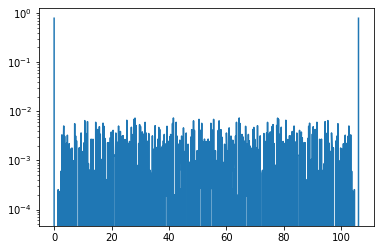

In [45]:
plt.plot(n,an)
plt.yscale("log")

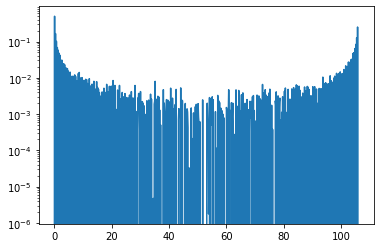

In [46]:
plt.plot(n,bn)
plt.yscale("log")

The Fourier elements that we expect to be zero according to the theory is on the interval t = -pi to t = 0 and on the interval t = pi to t = 2*pi. The resulting Nyquist Frequency is printed above and in order to give an accurate representation of the data we need about 250 samples.


## Question 2 - Frogs and Lily Pads

Modify the Jupyter Notebook called frogger.ipynb to include the possibility that the frog can jump in either direction (not just forward). Use the following algorithm:

From wherever the frog is currently sitting (i.e. anywhere from the starting position to the last lily pad), it can jump to any other available position, including back to the starting position, or to the other side of the stream.  The frog should continue jumping until that moment when it gets to the other side of the stream.  The probability should be uniform/equal for jumping to any available position.

The goal here is to calculate the average number of jumps, as function of the number of lily pads.

Does the final result surprise you?  

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lily~pads}$ = 30.

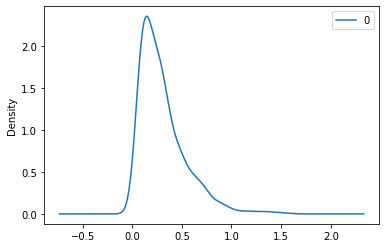

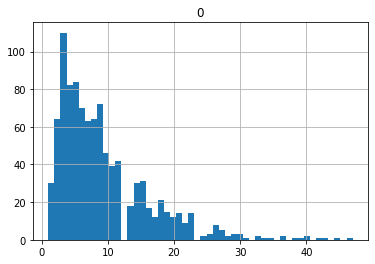

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import pandas as pd

a = []
b = []

npad = 30
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 1000
   
end = npad
for j in range(n_trys):
    while start < npad:
      if (start == 0):
        jump = int(random.uniform(1,(end-start+1)))
        while jump == 0:
          jump = int(random.uniform(1,(end-start+1)))
      else:
        jump = int(random.uniform((-1*(end-start+1)),(end-start+1)))
        while jump == 0:
          jump = int(random.uniform((-1*(end-start+1)),(end-start+1)))
        while jump + start < 0:
          jump = int(random.uniform((-1*(end-start+1)),(end-start+1)))
          while jump == 0:
            jump = int(random.uniform((-1*(end-start+1)),(end-start+1)))
      #print ("Jump = ",jump)
      start = start + jump
      #print ("Now at ",start)
      jumpsum = jumpsum + 1
    start = 0
    #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
    total_jumps = total_jumps + jumpsum
    a.append(jumpsum)
    c = jumpsum/npad
    b.append(c)
    jumpsum = 0

e = pd.DataFrame(b)
normyguyhopefully = e.plot.kde() #shows number of jumps taken per lilly pad,
                                 #should look normal as well as slightly positive
s = pd.DataFrame(a)
frogtendencies = s.hist(bins = 50) #shows the number of occurances of jumps it took
                                   #the frogs to get across the lilipads based on 30 pads
                                   #and 1000 frogs

The results from the simulation shows that the frogs tend to hop across fairly efficiently averaging .2 jumps per pad and getting over almost always less than 10 jumps. The results are normally distributed which agrees with theory. The final result still surprises me as there are plenty of scenarios in which the frog could infintely jump bakck and fourth witout ever making it across the pads, so I was surprised there wasn't an extraordinarily high number of jumps for a few trials.

## Question 3 - Random Walk

Begin with the example Jupyter Notebook called drunken_sailor.ipynb  

In the first example, we considered random walk in one dimension.  For each step that a sailor took, we sampled from a random Gaussian distribution with a mean value of 0 and a standard deviation of 1.  

In this question, we would like to consider a different underlying distribution for the step size.  Instead of using a Gaussian, choose the step size from a Poisson distribution with an average value of 1.  Remember that the Poisson distribution is defined for positive values of $x$ only, and so you will also have to randomly choose the direction of the step.

How do the results compare to choosing a Gaussian distribution of step size?  Do your results agree with the predictions of the central limit theorem?

In [48]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from scipy import stats 
from math import erfc  

def walkn(nsteps):
    mu = 0
    a = random.choice([True,False]) #account for both walking directions by randomly choosing a boolean since we are in 1-D
    if (a): 
      b = stats.poisson.rvs(1, size=nsteps) 
    else:
      b = -1 * stats.poisson.rvs(1, size=nsteps)
    r = b  # poisson distribution mean=0 variance=1
    return sum(r) 

def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  
        xvec = np.append(xvec,x)  
    return xvec  

nsteps = 100 
npart = 1000 

xvec = npart_walkn(npart,nsteps)

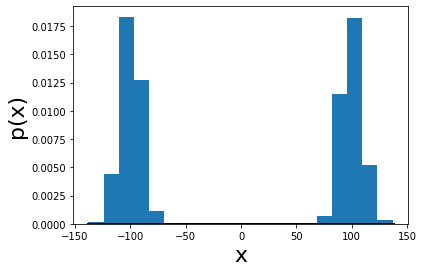

In [49]:
n, bins, patches = plt.hist(xvec,bins=20,density=True)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!
mlambda = 1  #lambda of our poisson
prob = (((mlambda)**nsteps)*((np.e)**-mlambda))/(scipy.special.factorial(nsteps,0)) #probability of our poisson
mypoi = stats.poisson(1, prob) 
y = mypoi.pmf(bins)  
plt.plot(bins,y,"k", lw=3 )  

The poisson distribution does not agree with central limit theorem as it tends towards the extremes of the random walk simulation. The centeral limit theorem would have the final positions tend to be closer to the mean value of 0, but as shown the poisson distribution favors the standard deviation of 1 on each step.